array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

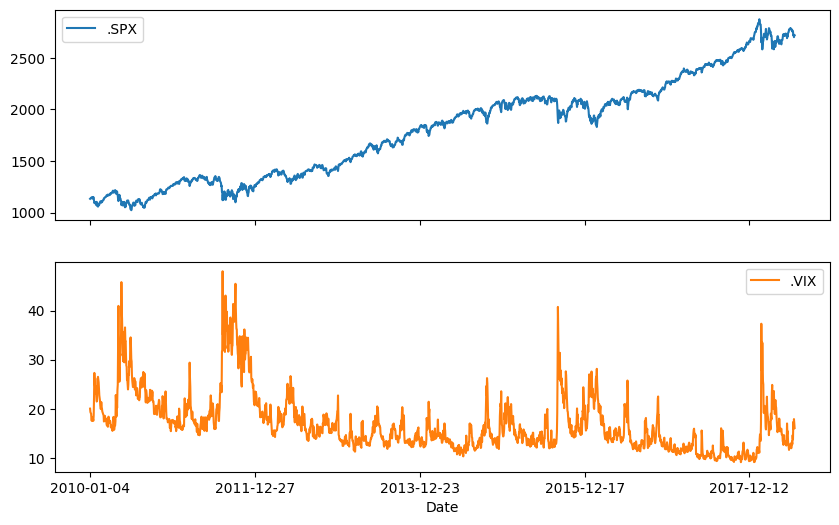

In [26]:
import numpy as np
import pandas as pd

filename = '../data/tr_eikon_eod_data.csv'
raw = pd.read_csv(filename, index_col='Date')
data = raw[['.SPX', '.VIX']].dropna()
data.plot(subplots=True, figsize=(10, 6))

<Axes: xlabel='Date'>

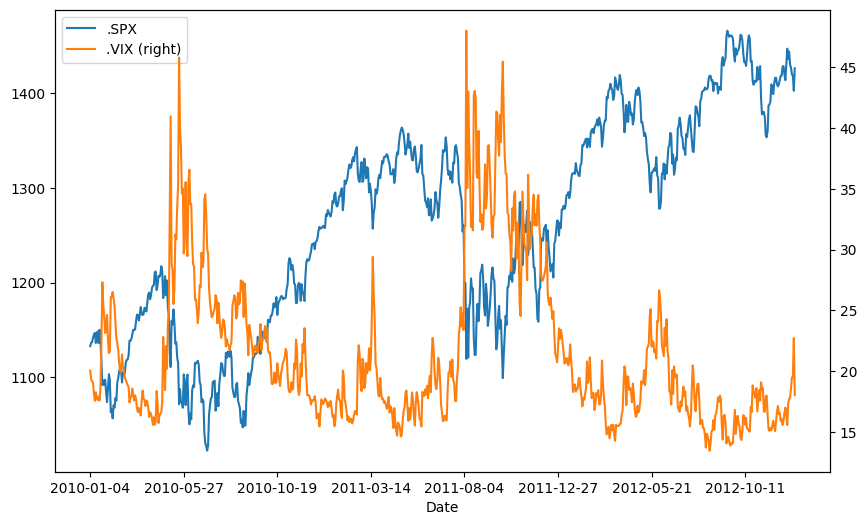

In [27]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6)) # selects the data until the given value DATE.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

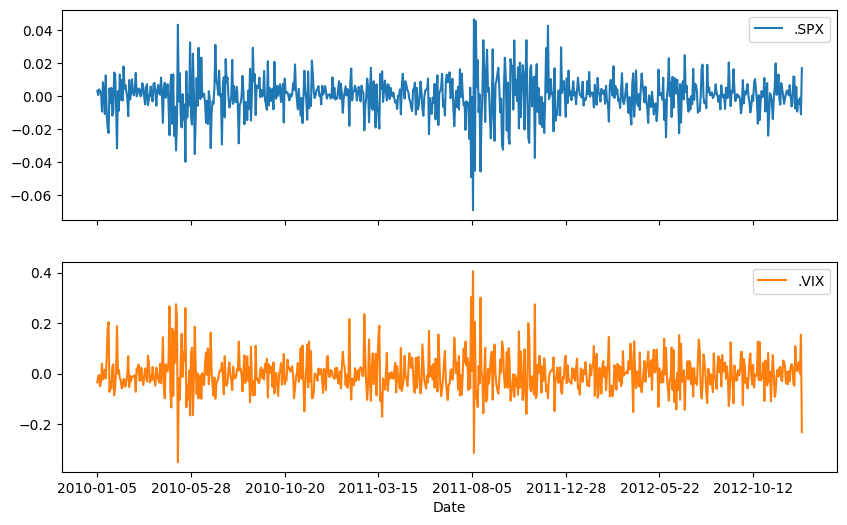

In [28]:
returns = np.log(data / data.shift(1))
returns.dropna(inplace=True)
returns.loc[:'2012-12-31'].plot(subplots=True, figsize=(10, 6))


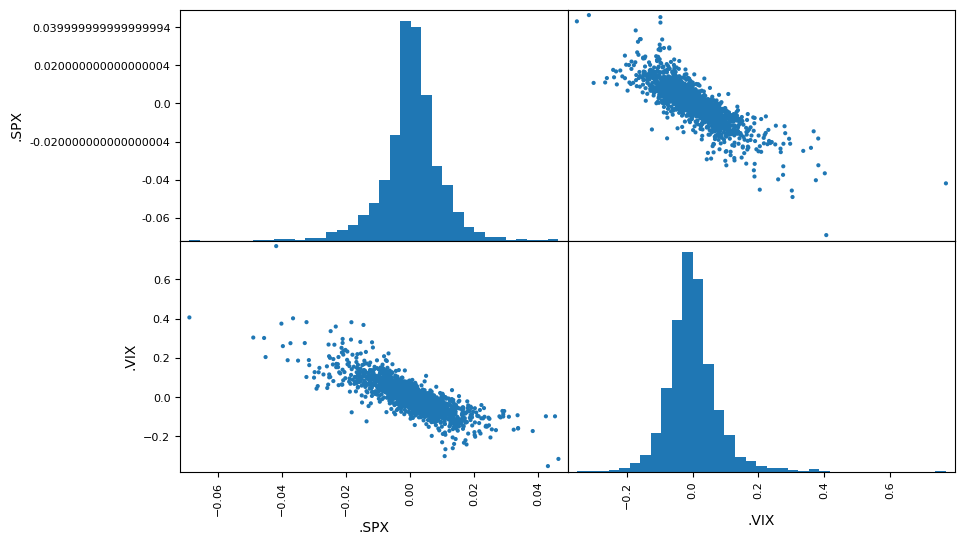

In [29]:
pd.plotting.scatter_matrix(
    returns,  # the data
    alpha=1,  # the alpha parameter for the opacity of the dots
    diagonal='hist',  # what to place on the diagonal (the histogram )
    hist_kwds={'bins': 35},  # keywords for the histogram
    figsize=(10, 6)
);

**OLS Regression**
With all these preparations, an ordinary least-squares (OLS) regression analysis is
convenient to implement. Figure 8-12 shows a scatter plot of the log returns and the
linear regression line through the cloud of dots. The slope is obviously negative, providing support
for the stylized fact about the negative correlation between the two indices:

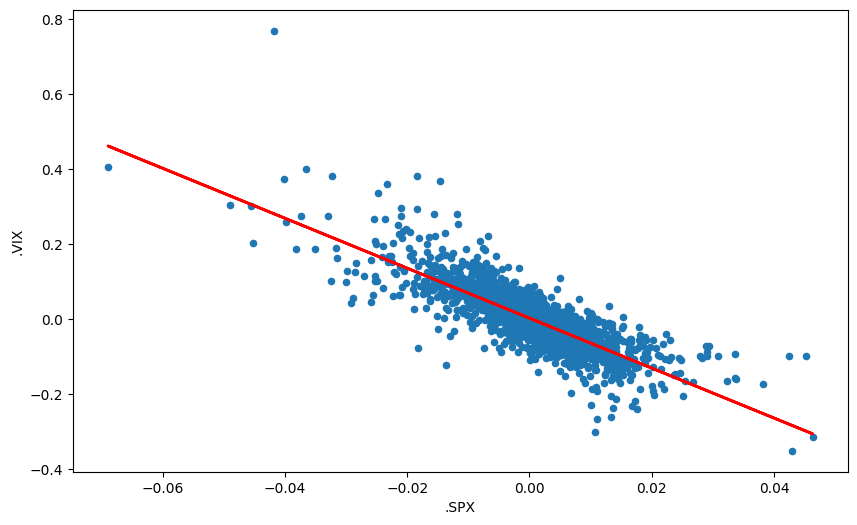

In [30]:
reg = np.polyfit(returns['.SPX'], returns['.VIX'], deg=1)  # implement linear OLS
ax = returns.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  # plot the log returns scatter
ax.plot(returns['.SPX'], np.polyval(reg, returns['.SPX']), 'r', lw=2);  # add linear regression line

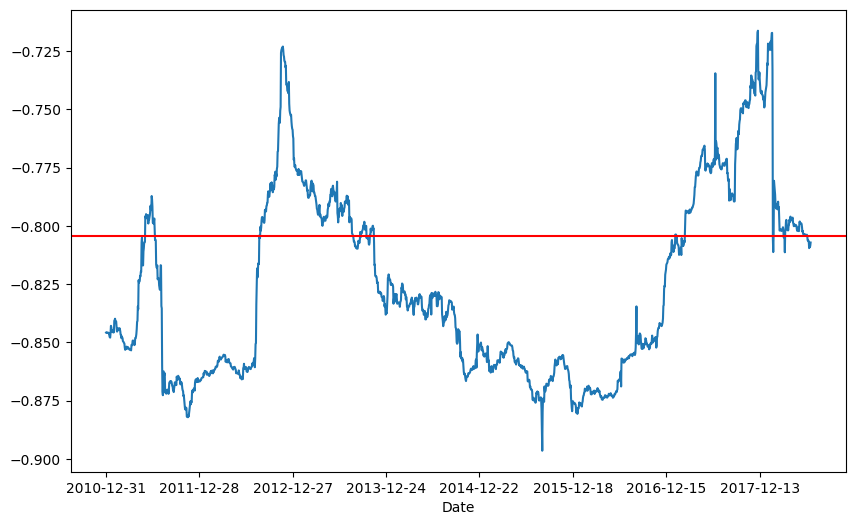

In [31]:
returns.corr()  # the correlation matrix for the whole DataFrame
ax = returns['.SPX'].rolling(window=252).corr(returns['.VIX']).plot(figsize=(10, 6))  # plot rolling correlation over time
ax.axhline(returns.corr().iloc[0, 1], c='r');  # plot the static value of the whole DataFrame

**High Frequency Data** Handling this data is about the same as with EOD data. You might want to resample the data depending on the scenario

In [36]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('../data/fxcm_eur_usd_tick_data.csv', index_col=0, parse_dates=True)

CPU times: user 560 ms, sys: 40.2 ms, total: 600 ms
Wall time: 599 ms


In [37]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


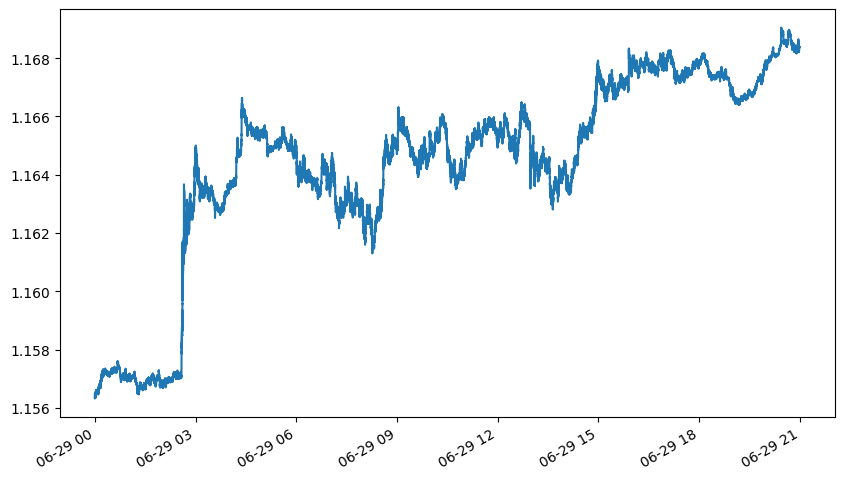

In [39]:
tick['Mid'] = tick.mean(axis=1)  # Calculate Mid price for every data row
tick['Mid'].plot(figsize=(10, 6));

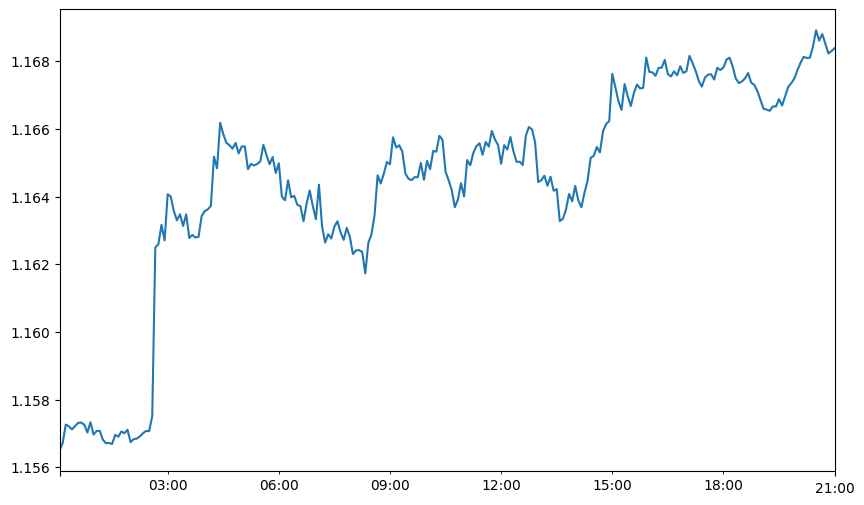

In [40]:
tick_resam = tick.resample(rule='5min', label='right').last()  # resample to 5m
tick_resam['Mid'].plot(figsize=(10, 6));